                                LOAN PREDICTION STATTUS PROJECT
                                     
                                     
                                    Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

We  have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

                                
                                
                                
                                
                                
                                
                                

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [100]:
LSdf=pd.read_csv('loan_prediction.csv')

In [101]:
LSdf

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Here we have seen that few column name doesnt make any sense in the dataset  so we need to rename the column based on the project requirement

In [102]:
LSdf.rename(columns={'LP001002':'Loan_ID','Male':'Gender','No':'Married','0':'Dependents','Graduate':'Education','No.1':'Self_Employed','5849':'Applicant_Income','0.1':'CoapplicantIncome','Unnamed: 8':'Loan_Amount','360':'Loan_Amount_Term','1':'Credit_History','Urban':'Property_Area',
'Y':'Loan_Status'},inplace=True)

In [103]:
LSdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   Applicant_Income   613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [104]:
LSdf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant_Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [105]:
LSdf.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
# Here we observed that in this feature we have integer value but still in the dataset it is showing  object Types
LSdf.Dependents

0       1
1       0
2       0
3       0
4       2
       ..
608     0
609    3+
610     1
611     2
612     0
Name: Dependents, Length: 613, dtype: object

In [107]:
LSdf.Dependents.value_counts()

Dependents
0     344
1     102
2     101
3+     51
Name: count, dtype: int64

In [108]:
LSdf['Dependents']=LSdf['Dependents'].replace({'3+':'4'})

In [109]:
LSdf[LSdf['Dependents'].isna()]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
101,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
119,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
225,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
227,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
292,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
300,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
331,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
334,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
345,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [110]:
LSdf[LSdf['Loan_ID'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [111]:
# Showing the statistical summary of the numericak feature 
LSdf.describe()

,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [112]:
# Checking for the count of unique value in each feature 
LSdf.nunique()

Loan_ID              613
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
Applicant_Income     504
CoapplicantIncome    287
Loan_Amount          203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [113]:
for col in LSdf.columns:
    print(LSdf[col].value_counts())

Loan_ID
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64
Gender
Male      488
Female    112
Name: count, dtype: int64
Married
Yes    398
No     212
Name: count, dtype: int64
Dependents
0    344
1    102
2    101
4     51
Name: count, dtype: int64
Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     499
Yes     82
Name: count, dtype: int64
Applicant_Income
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64
CoapplicantIncome
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
Loan_Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     

In [114]:
# chcking for  the duplicates values in the feature 
LSdf.duplicated().sum()

0

In [ ]:
# Handling missing values

In [115]:
LSdf.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
LSdf['Dependents'] = pd.to_numeric(LSdf['Dependents'], errors='coerce')


In [117]:
LSdf.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
Applicant_Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [118]:
cat_missing=['Gender','Married','Self_Employed']

In [119]:
for col in cat_missing:
    LSdf[col]=LSdf[col].fillna(LSdf[col].mode()[0])

In [120]:
LSdf.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
num_missing=['Dependents','Loan_Amount','Loan_Amount_Term','Credit_History']

In [122]:
for col in num_missing:
    LSdf[col]=LSdf[col].fillna(LSdf[col].mean())

In [123]:
LSdf.Loan_ID

0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001011
         ...   
608    LP002978
609    LP002979
610    LP002983
611    LP002984
612    LP002990
Name: Loan_ID, Length: 613, dtype: object

In [124]:
LSdf.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant_Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
# handled missing values 

In [97]:
LSdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
LSdf['Gender'].value_counts()

Gender
Male      501
Female    112
Name: count, dtype: int64

Text(0, 0.5, 'count')

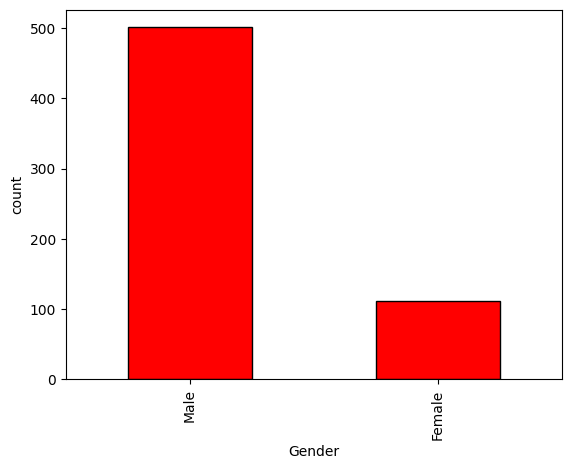

In [26]:
LSdf['Gender'].value_counts().plot(kind='bar',color='red',edgecolor='black')
plt.ylabel('count')

Text(0, 0.5, 'count')

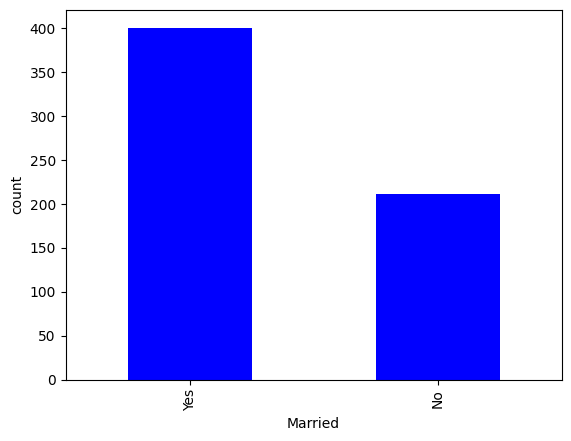

In [100]:
LSdf['Married'].value_counts().plot(kind='bar',color='blue')
plt.ylabel('count')

In [102]:
LSdf['Dependents'].value_counts()

Dependents
0.000000    344
1.000000    102
2.000000    101
4.000000     51
0.849498     15
Name: count, dtype: int64

Text(0, 0.5, 'count')

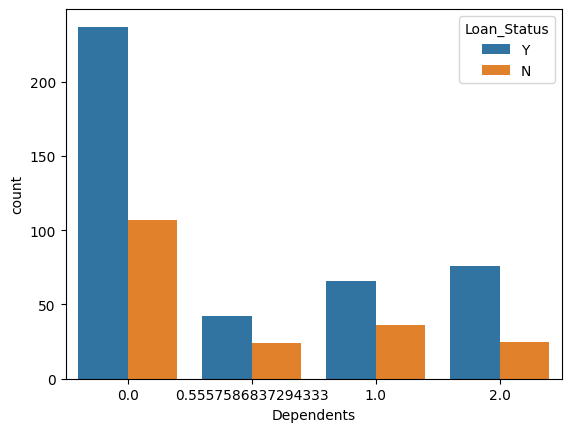

In [43]:
sns.countplot(x=LSdf['Dependents'],hue='Loan_Status',data=LSdf)
plt.ylabel('count')

In [106]:
LSdf['Education'].value_counts()

Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64

Text(0, 0.5, 'count')

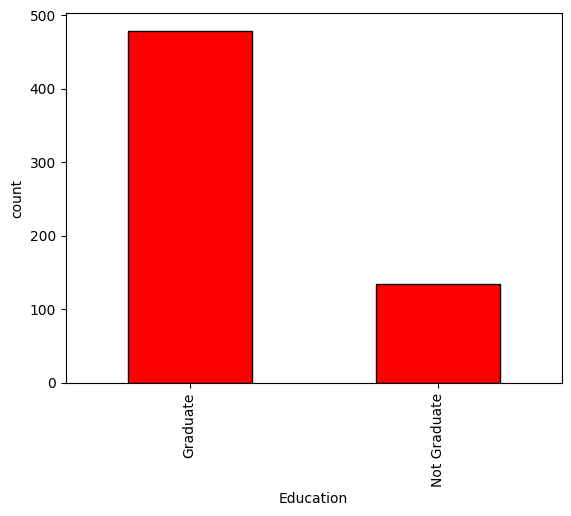

In [114]:
LSdf['Education'].value_counts().plot(kind='bar',color='red',edgecolor='black')
plt.ylabel('count')

In [ ]:
#Here from the above dataset  we observed that  maximum number of applicant who applied for loan are Graduates.
# Out of total applicant 479 applicant are graduate and 134 applicant are non graduate 


In [108]:
LSdf['Self_Employed'].value_counts()

Self_Employed
No     531
Yes     82
Name: count, dtype: int64

Text(0, 0.5, 'count')

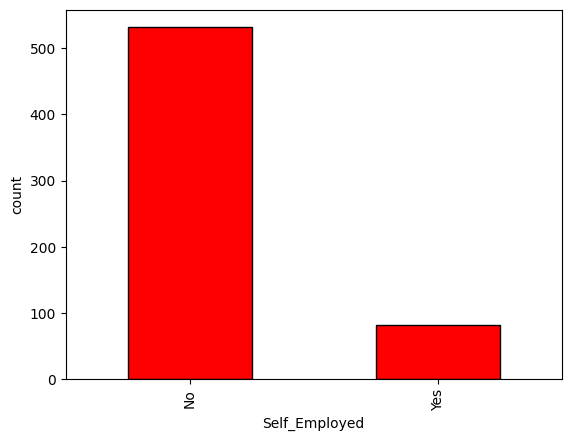

In [113]:
LSdf['Self_Employed'].value_counts().plot(kind='bar',color='red',edgecolor='black')
plt.ylabel('count')

<Axes: xlabel='Education'>

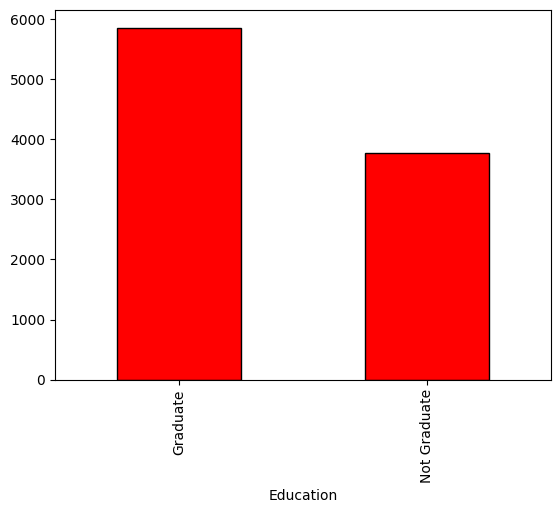

In [112]:
income=LSdf.groupby('Education')['Applicant_Income'].mean()
income.plot(kind='bar',color='red',edgecolor='black')

<Axes: xlabel='Self_Employed'>

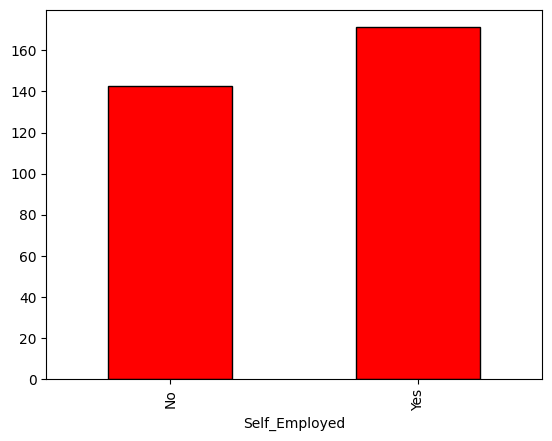

In [118]:
loan_amount=LSdf.groupby('Self_Employed')['Loan_Amount'].mean()

loan_amount.plot(kind='bar',color='red',edgecolor='black')

In [ ]:
Credit_History

<Axes: xlabel='Self_Employed'>

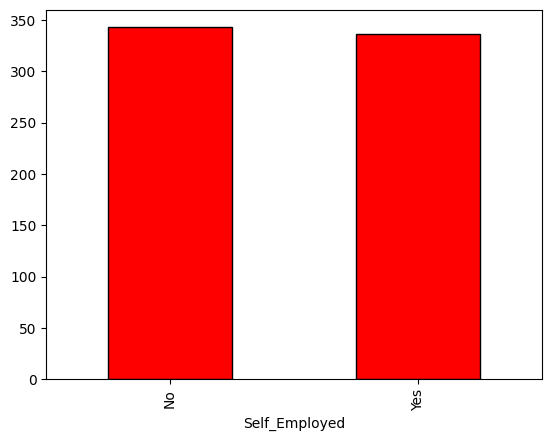

In [119]:
loan_term=LSdf.groupby('Self_Employed')['Loan_Amount_Term'].mean()

loan_term.plot(kind='bar',color='red',edgecolor='black')

In [ ]:
# Loan_Amount Term for both  the Employed and self employed are same 

In [27]:
LSdf['Credit_History'].value_counts()

Credit_History
1.000000    474
0.000000     89
0.841918     50
Name: count, dtype: int64

<Axes: xlabel='Self_Employed'>

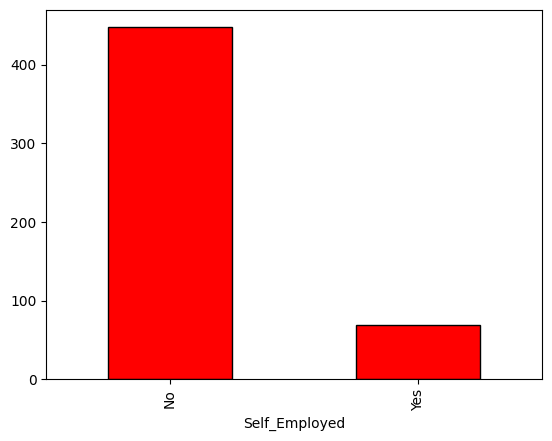

In [28]:
hist_credit=LSdf.groupby('Self_Employed')['Credit_History'].sum()

hist_credit.plot(kind='bar',color='red',edgecolor='black')

<Axes: xlabel='Property_Area', ylabel='count'>

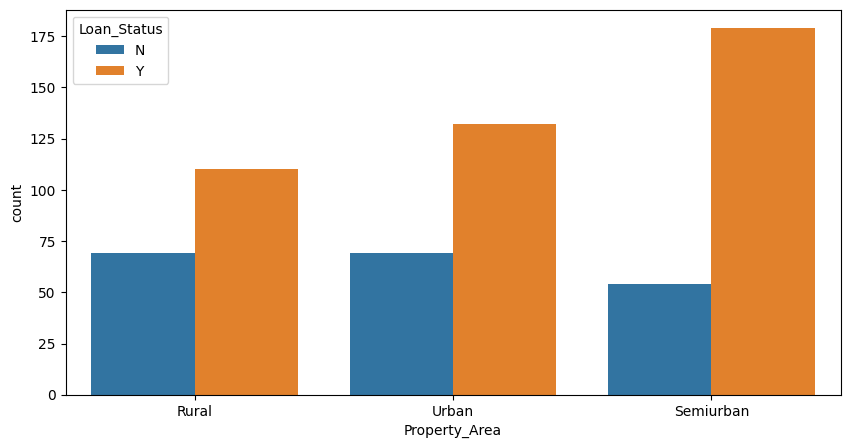

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=LSdf)

In [130]:
LSdf['Loan_Status'].value_counts()

Loan_Status
Y    421
N    192
Name: count, dtype: int64

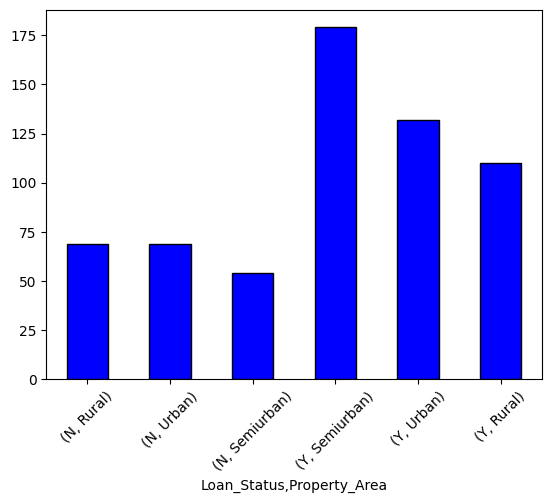

In [37]:
status=LSdf.groupby('Loan_Status')['Property_Area'].value_counts()

status.plot(kind='bar',color='blue',edgecolor='black')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Credit_History', ylabel='count'>

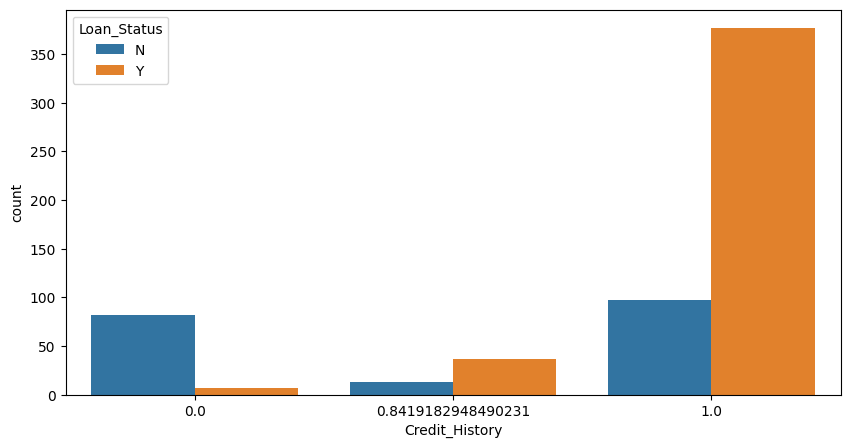

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=LSdf)

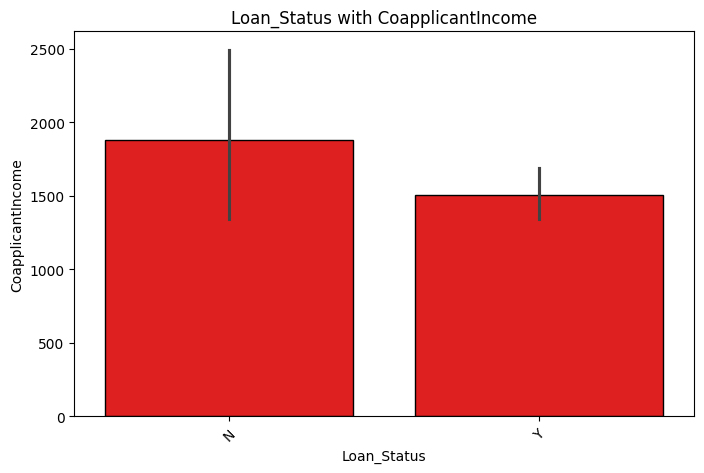

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=LSdf,color='red',edgecolor='black')
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Herefrom the above observation one think is clear that getting the approval is not depend on the high income of Co-Applicant

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

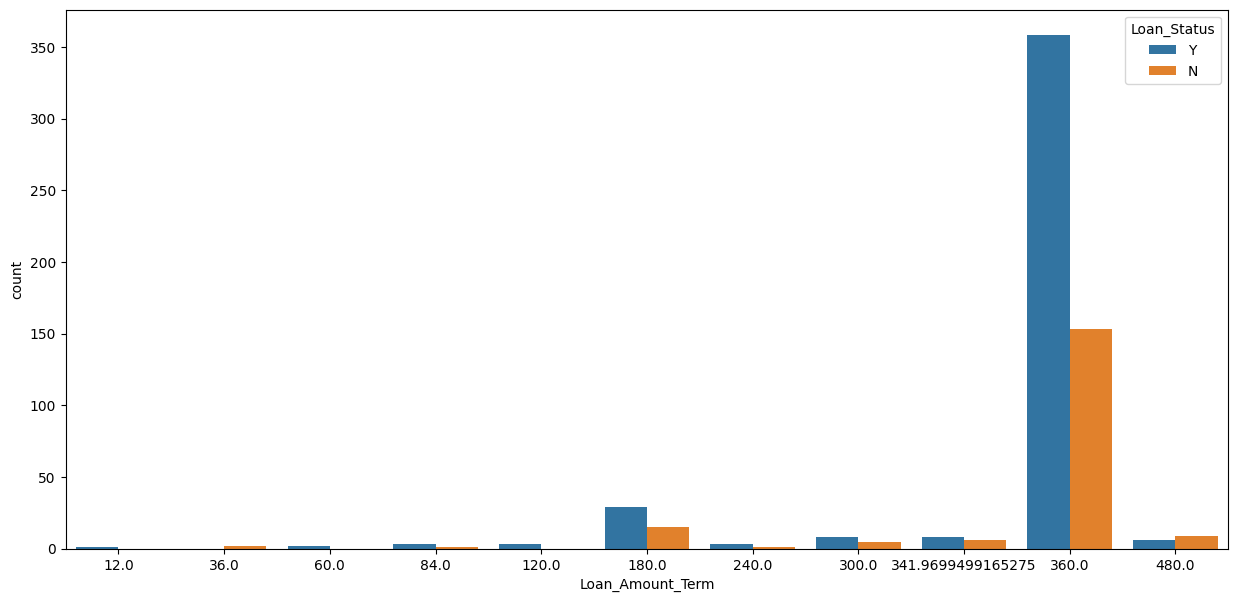

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=LSdf)

In [40]:
LSdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             613 non-null    object 
 2   Married            613 non-null    object 
 3   Dependents         613 non-null    float64
 4   Education          613 non-null    object 
 5   Self_Employed      613 non-null    object 
 6   Applicant_Income   613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   Loan_Amount        613 non-null    float64
 9   Loan_Amount_Term   613 non-null    float64
 10  Credit_History     613 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


                Using LabelEncoder for convering categorical to numerical

In [125]:
cat_feature=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [126]:
le =LabelEncoder()

In [127]:
for col in cat_feature :
    LSdf[col]=le.fit_transform(LSdf[col])

In [128]:
LSdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
609,LP002979,1,1,4.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
610,LP002983,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
611,LP002984,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
# Now we have finally converted categorical feature into numerical feature 

In [129]:
# Here we have dropped Loan_ID from the dataset because all the values in it are unique and not useful for model prediction
LSdf.drop('Loan_ID',axis=1,inplace=True)

In [130]:
correlation=LSdf.corr()

In [131]:
correlation['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540269
Married              0.093165
Property_Area        0.030815
Gender               0.017477
Dependents           0.000020
Self_Employed       -0.003270
Applicant_Income    -0.004792
Loan_Amount_Term    -0.021288
Loan_Amount         -0.036430
CoapplicantIncome   -0.058614
Education           -0.085354
Name: Loan_Status, dtype: float64

<Axes: >

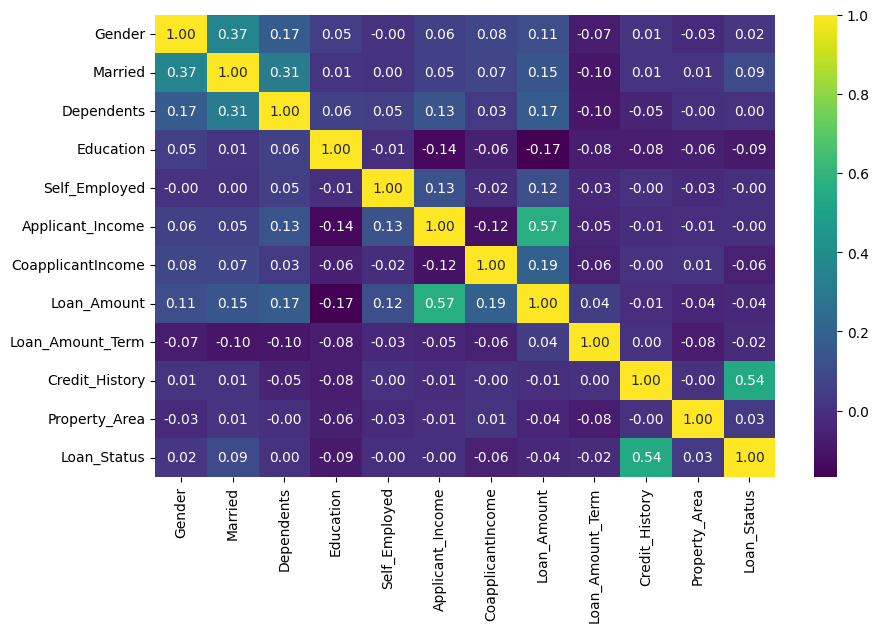

In [132]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

                        # Checking the distribution of data in the fetaure

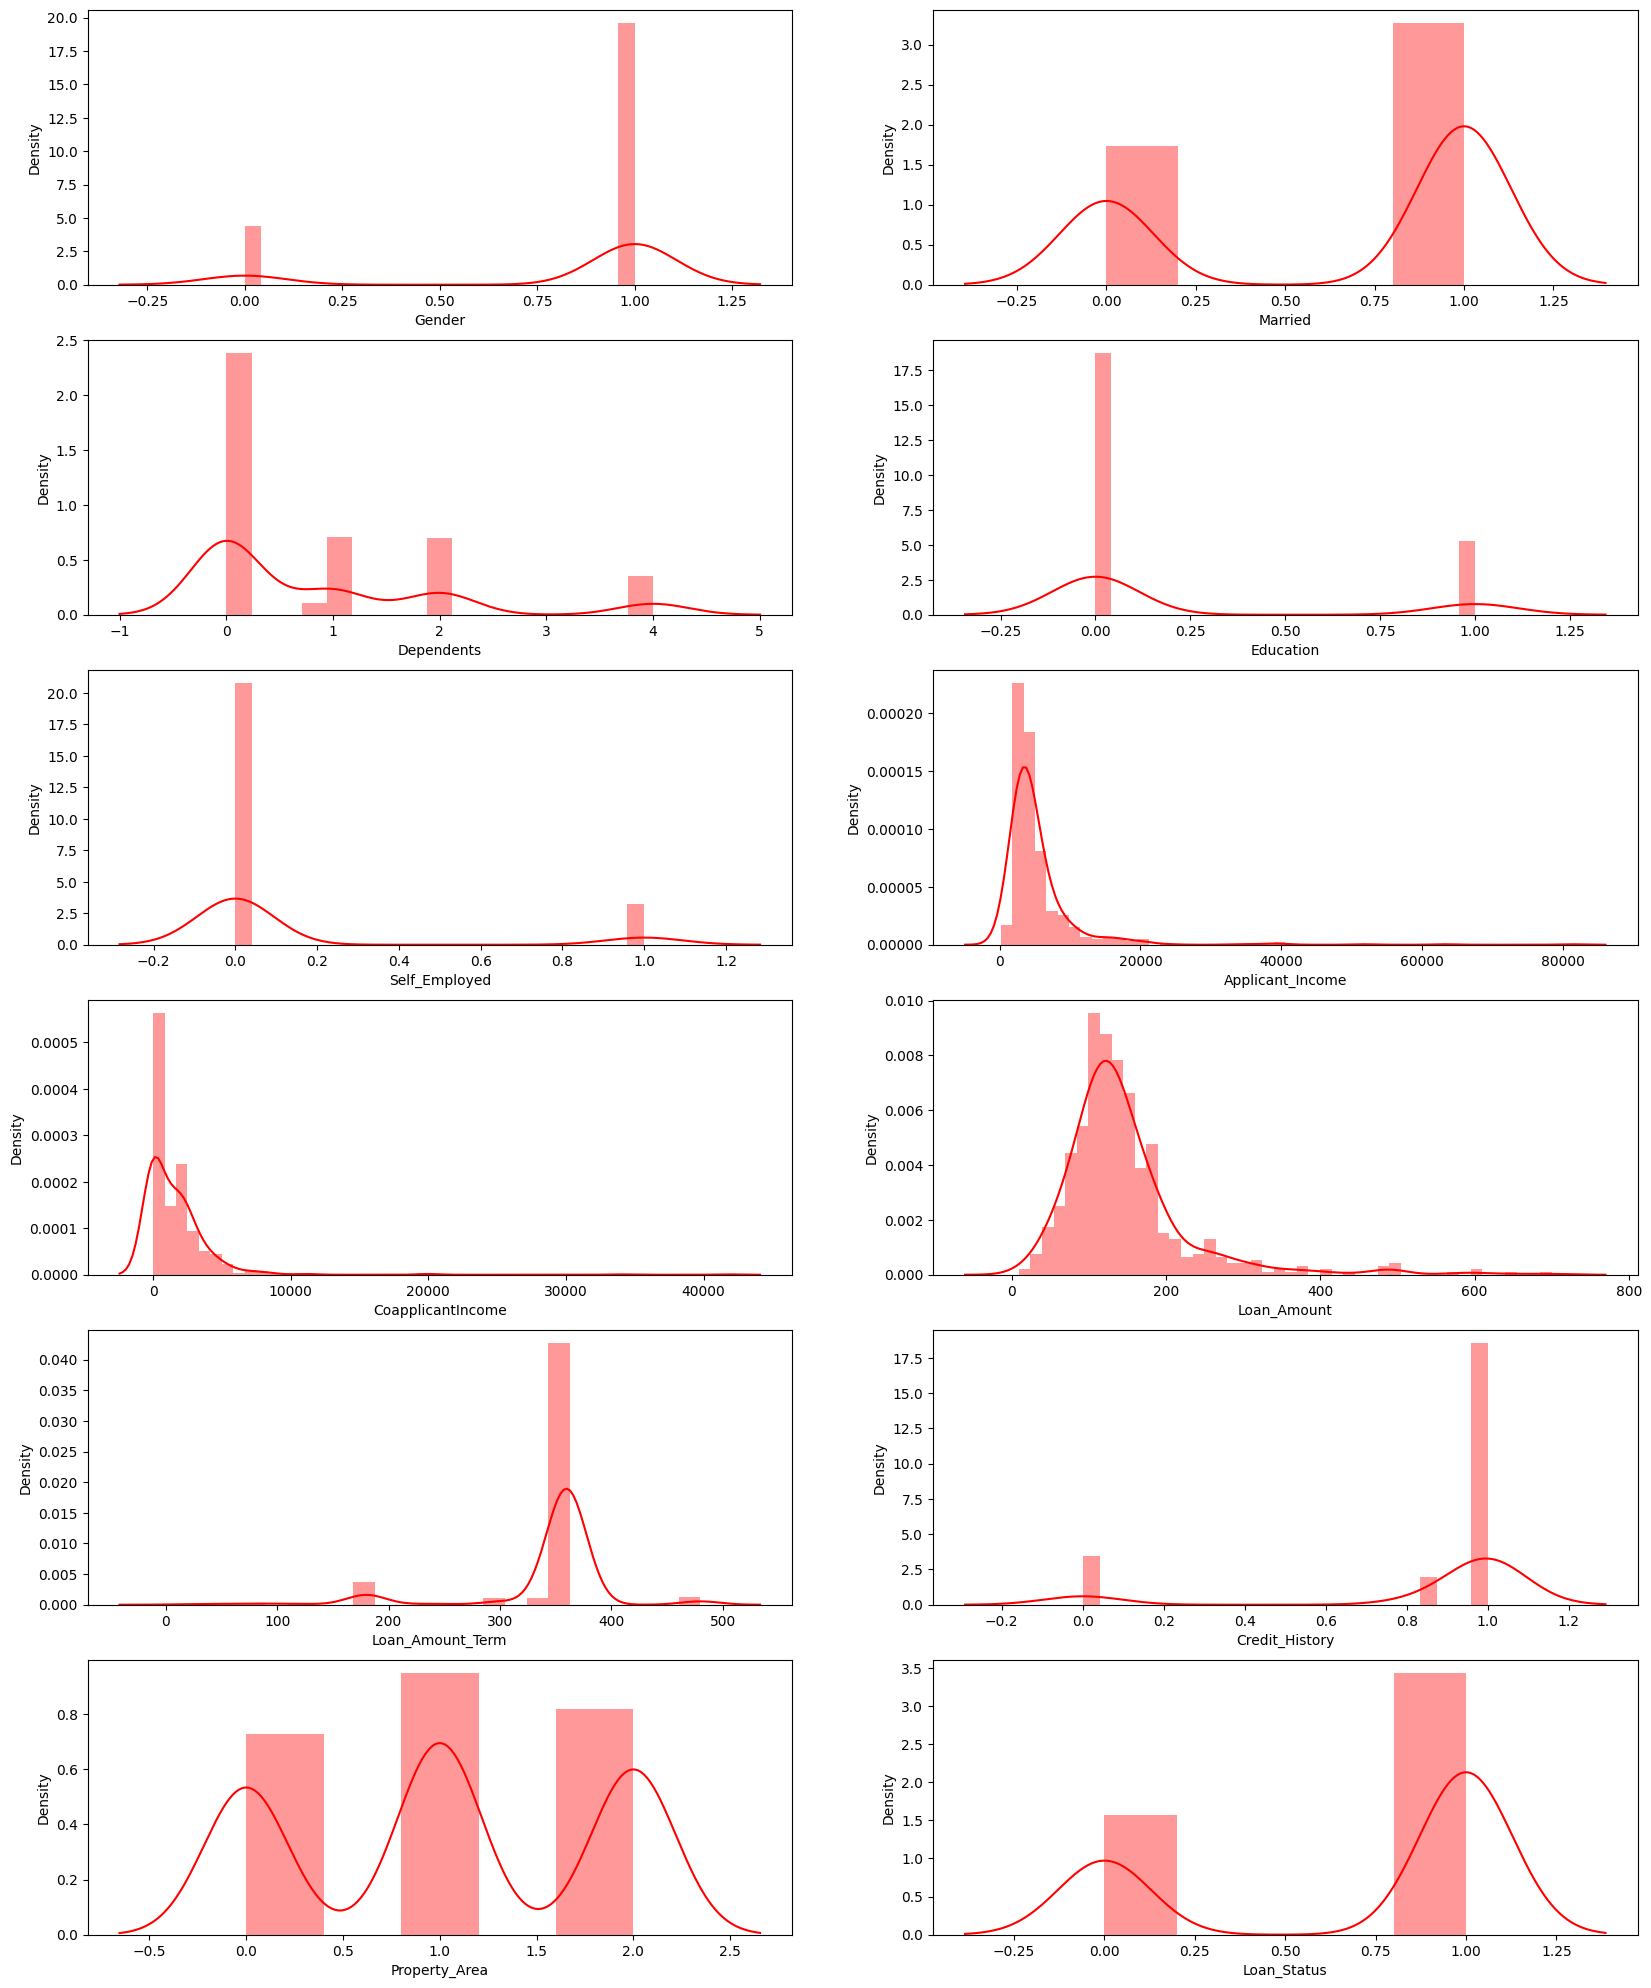

In [133]:
plt.figure(figsize=(20,25))
for i in enumerate(LSdf.columns):
    plt.subplot(6,2,i[0]+1)
    sns.distplot(LSdf[i[1]],color='r')


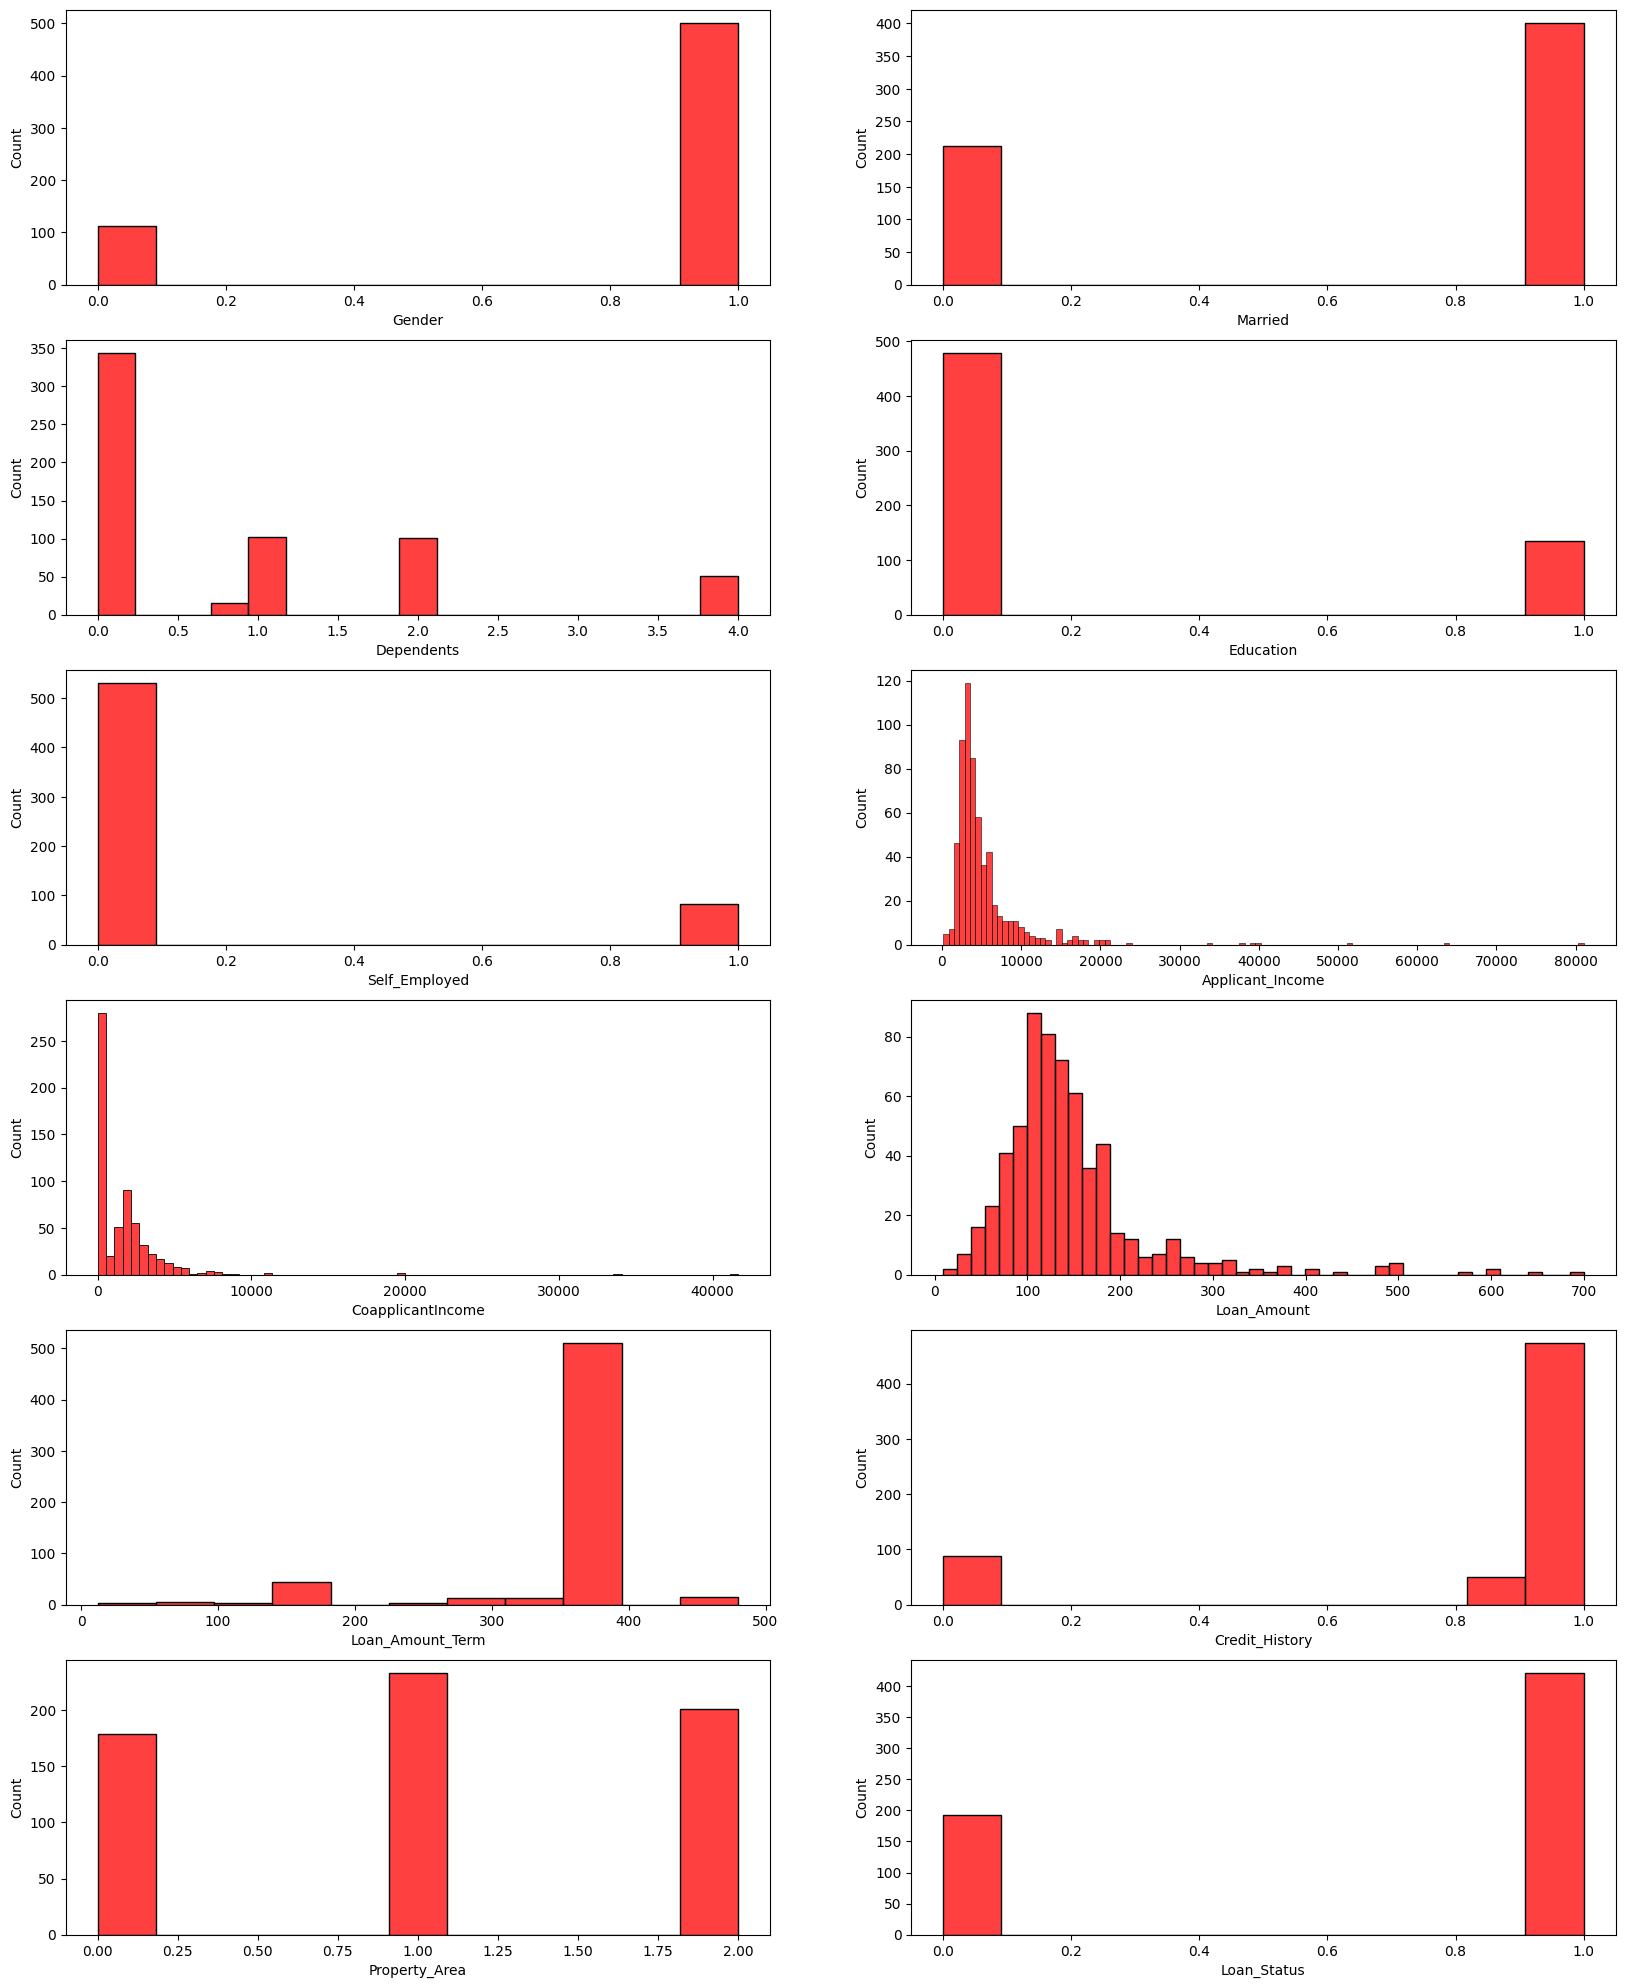

In [134]:
plt.figure(figsize=(20,25))
for i in enumerate(LSdf.columns):
    plt.subplot(6,2,i[0]+1)
    sns.histplot(LSdf[i[1]],color='r')


                                CHECKING FOR OUTLIERS 

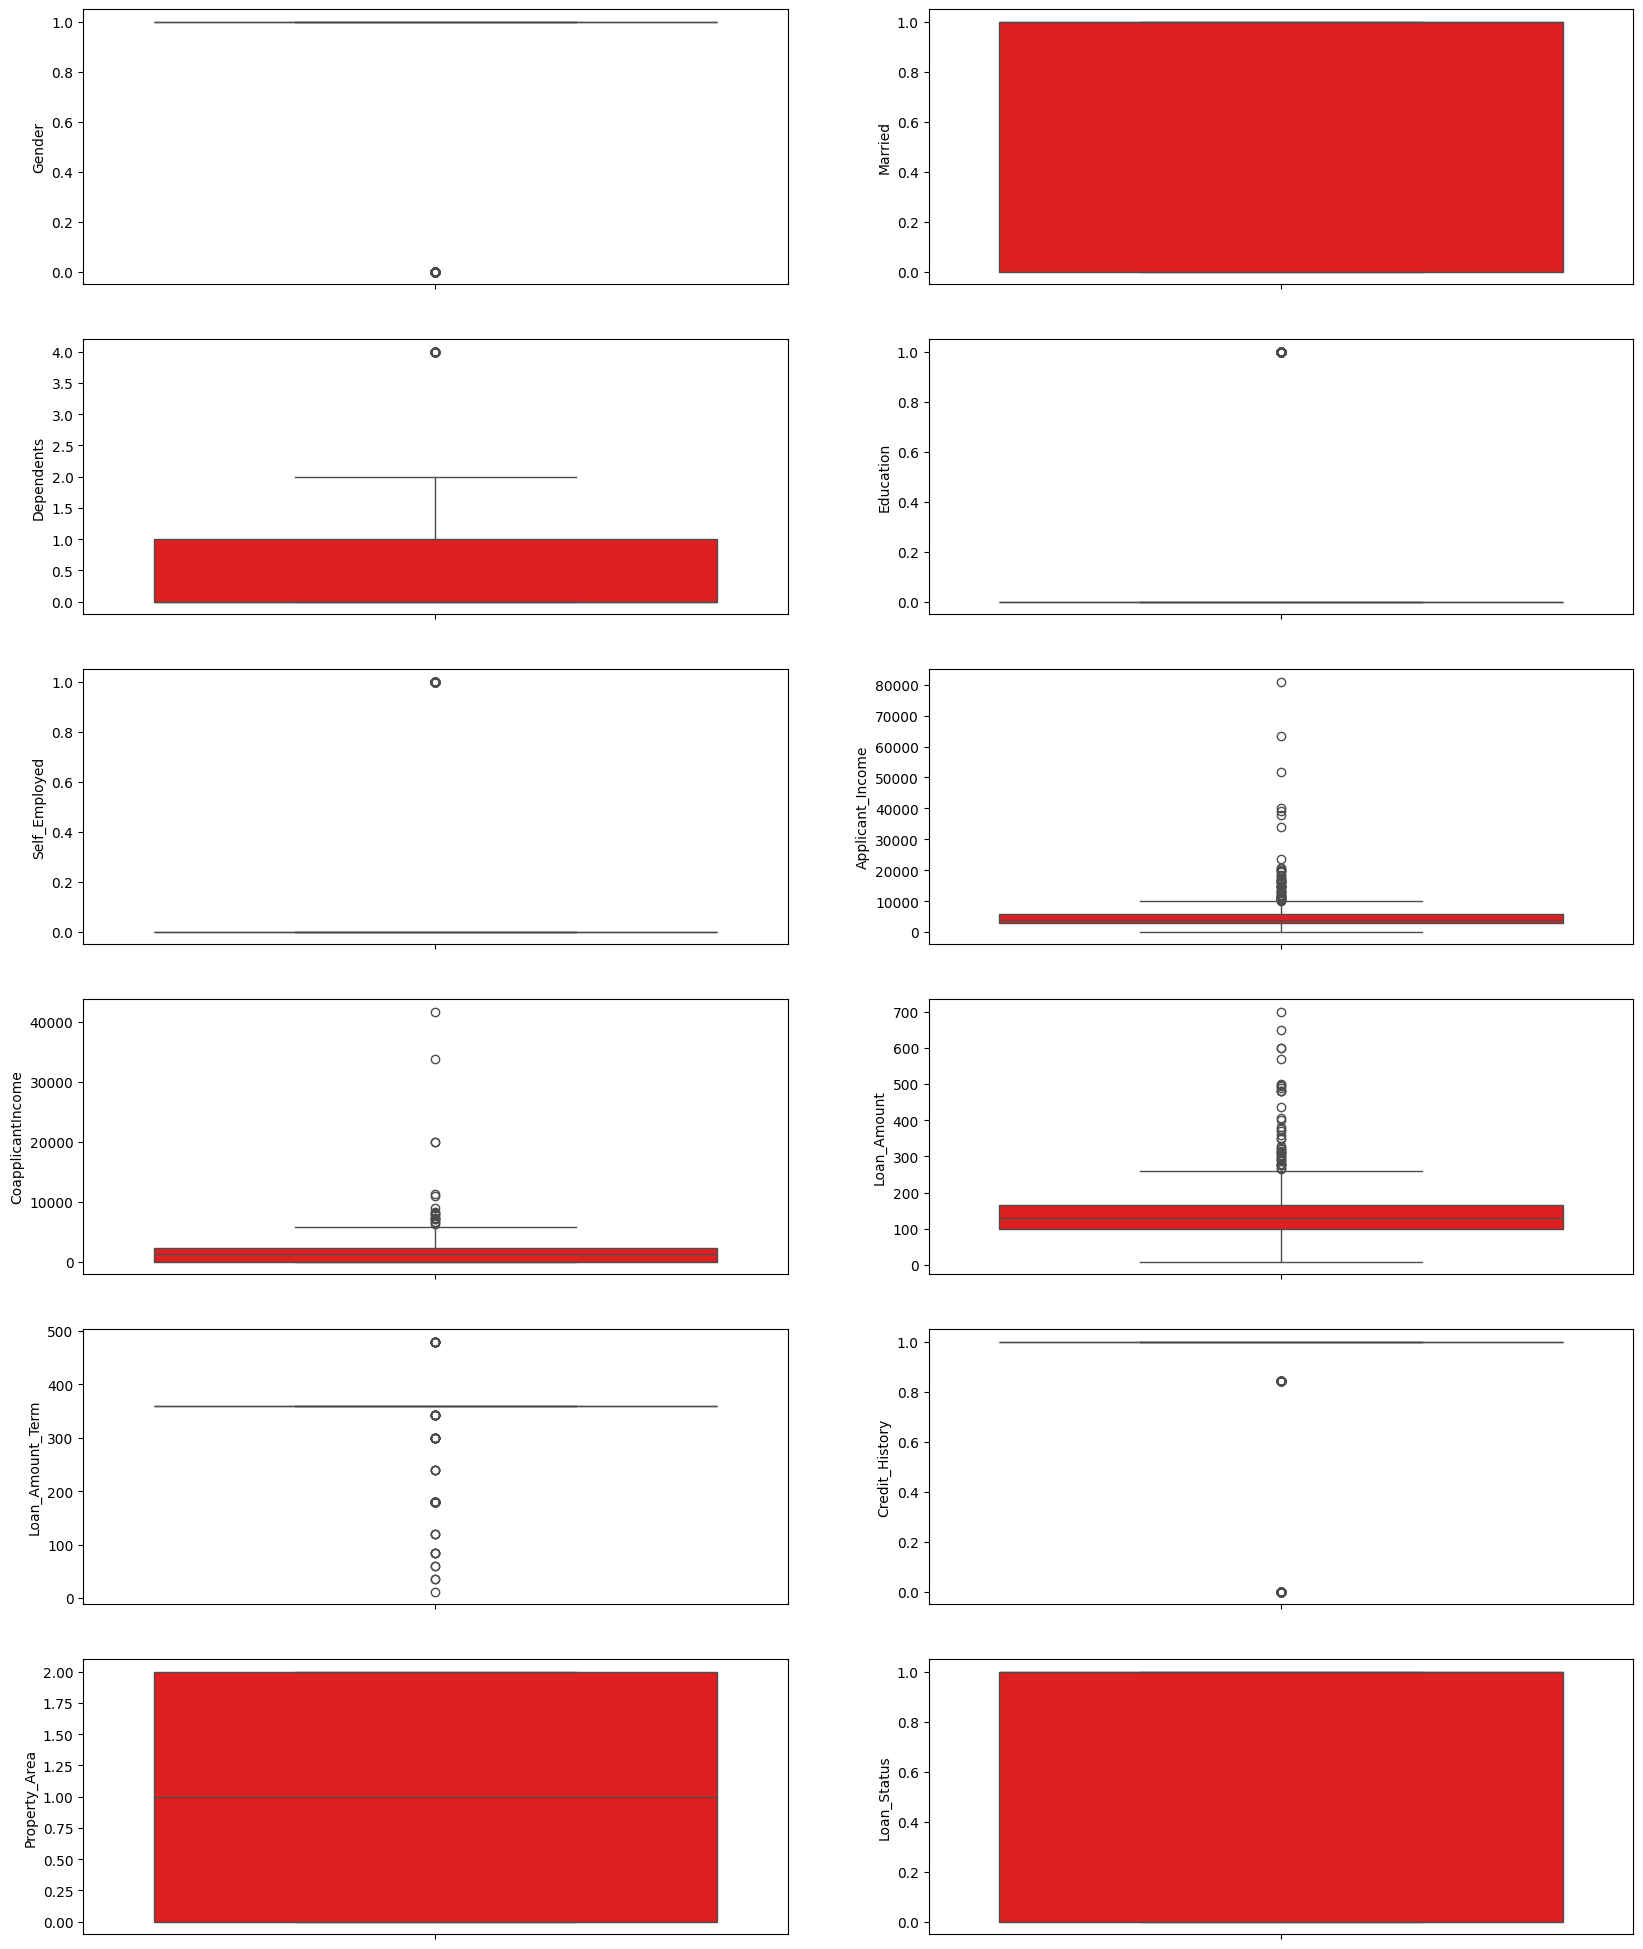

In [135]:
plt.figure(figsize=(20,25))
for i in enumerate(LSdf.columns):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(LSdf[i[1]],color='r')


In [136]:
LSdf.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
Applicant_Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [137]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  
#for i in avdf.columns:
    Q1=LSdf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=LSdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    LSdf[[col]]=arb.fit_transform(LSdf[[col]])
    plt.boxplot(LSdf[col])


In [138]:
outlier_feature=['Applicant_Income','CoapplicantIncome','Loan_Amount']

In [139]:
term_feature =['Loan_Amount_Term']

360.0
360.0


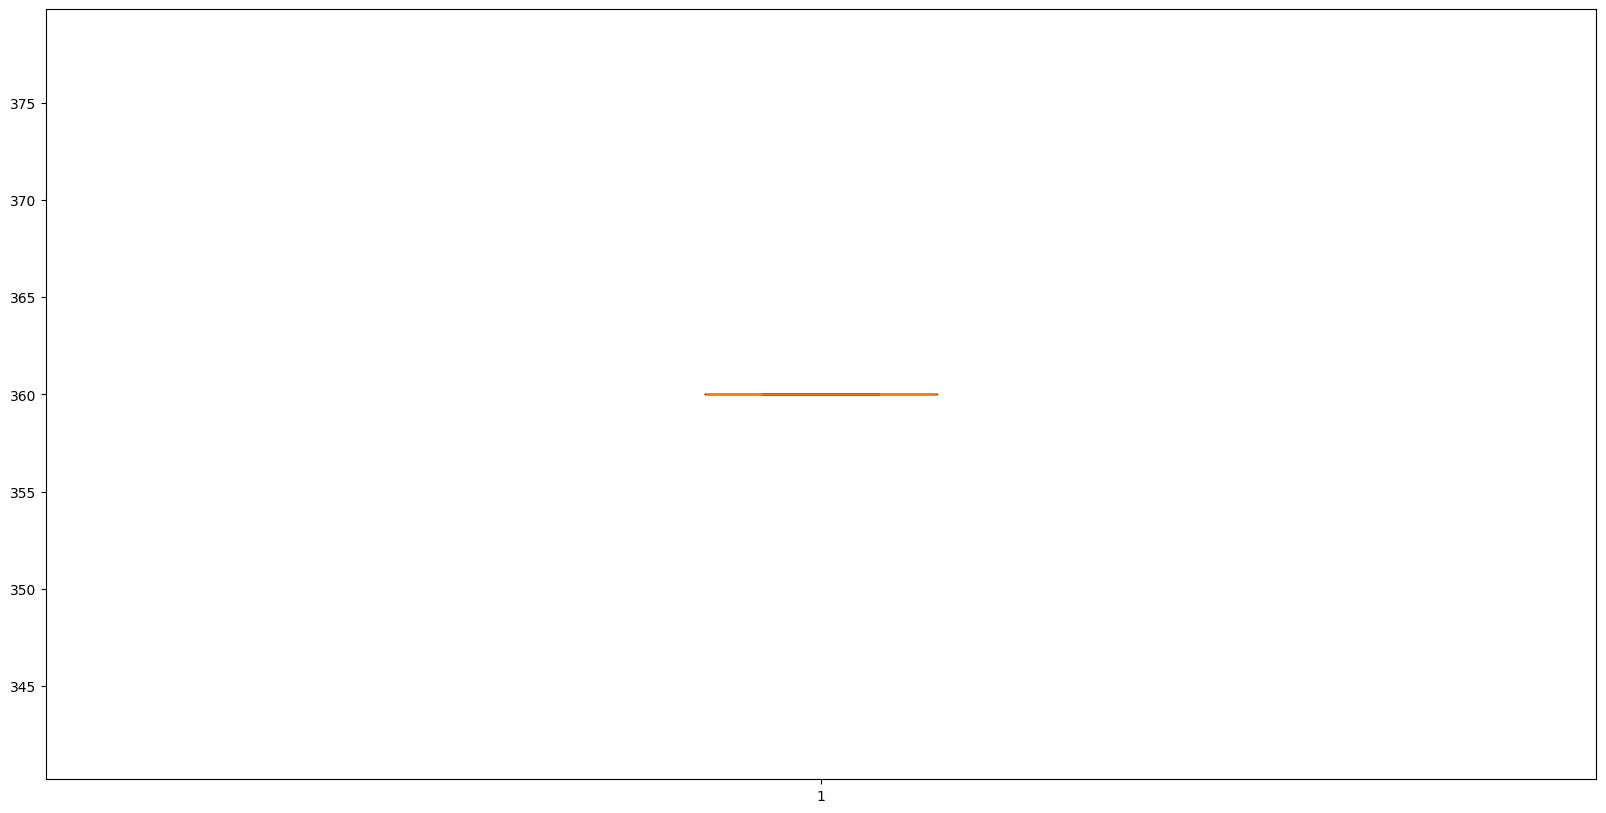

In [140]:
for col in term_feature:
    remove_outliers(col)

-1480.0
10136.0
-3453.0
5755.0
2.5
262.5


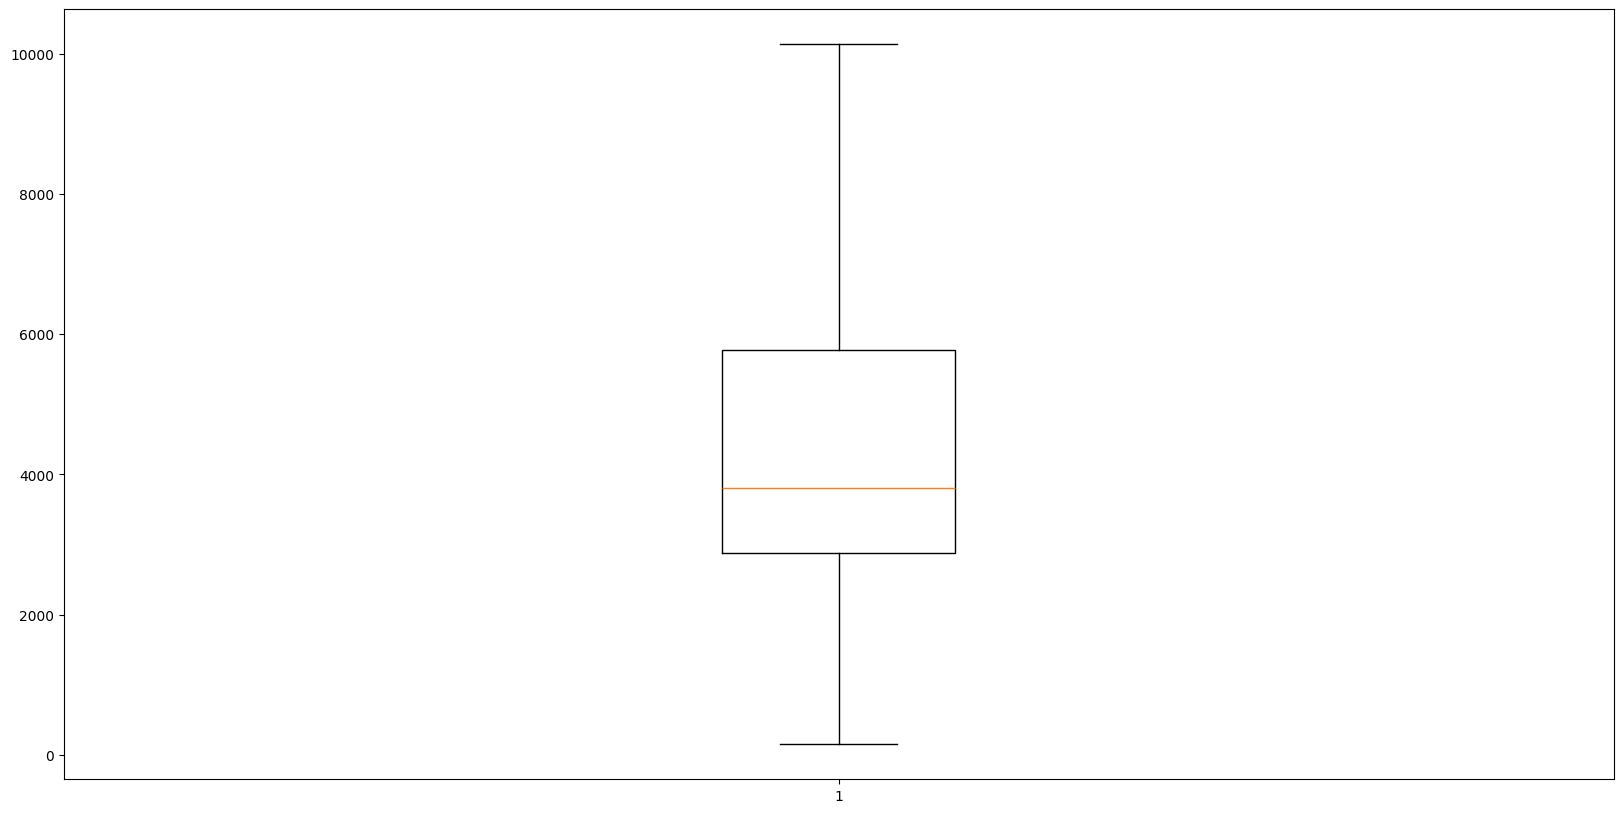

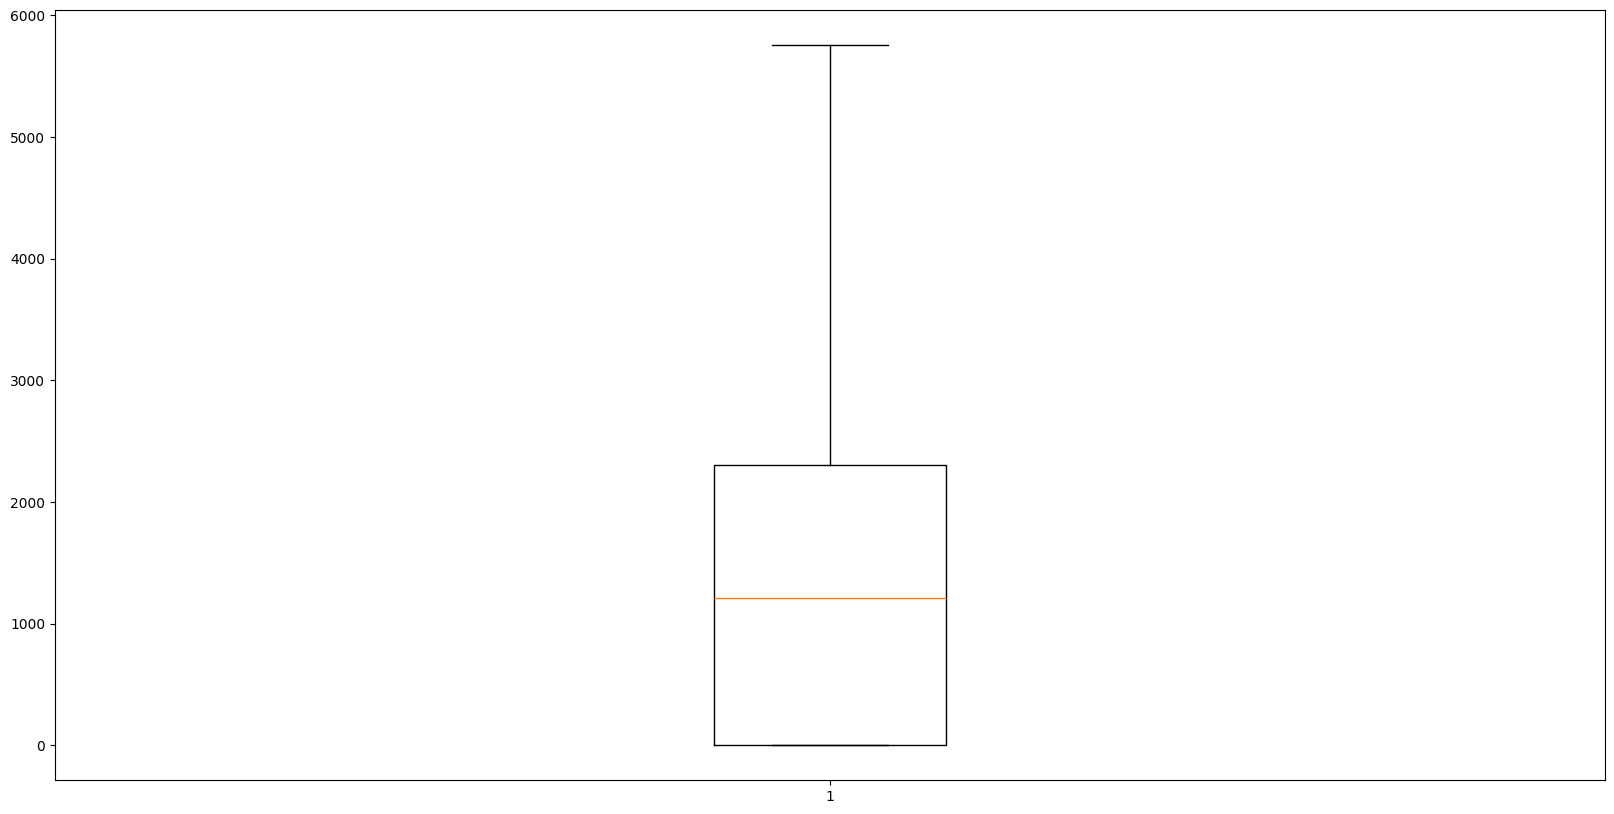

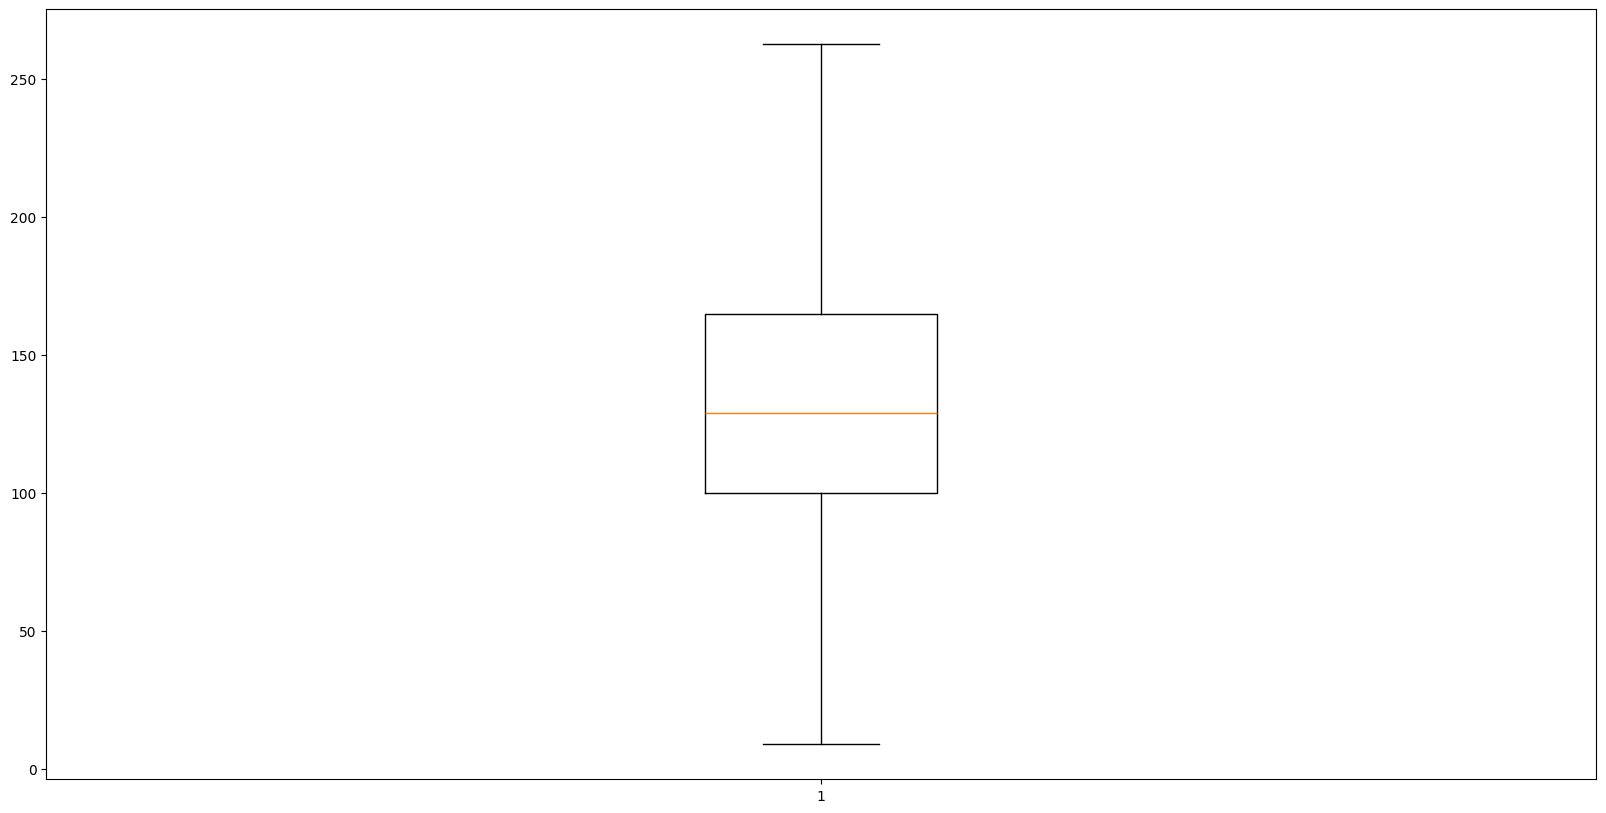

In [141]:
for col in outlier_feature:
    remove_outliers(col)

In [ ]:
# Now we checked Outliers has been removed 

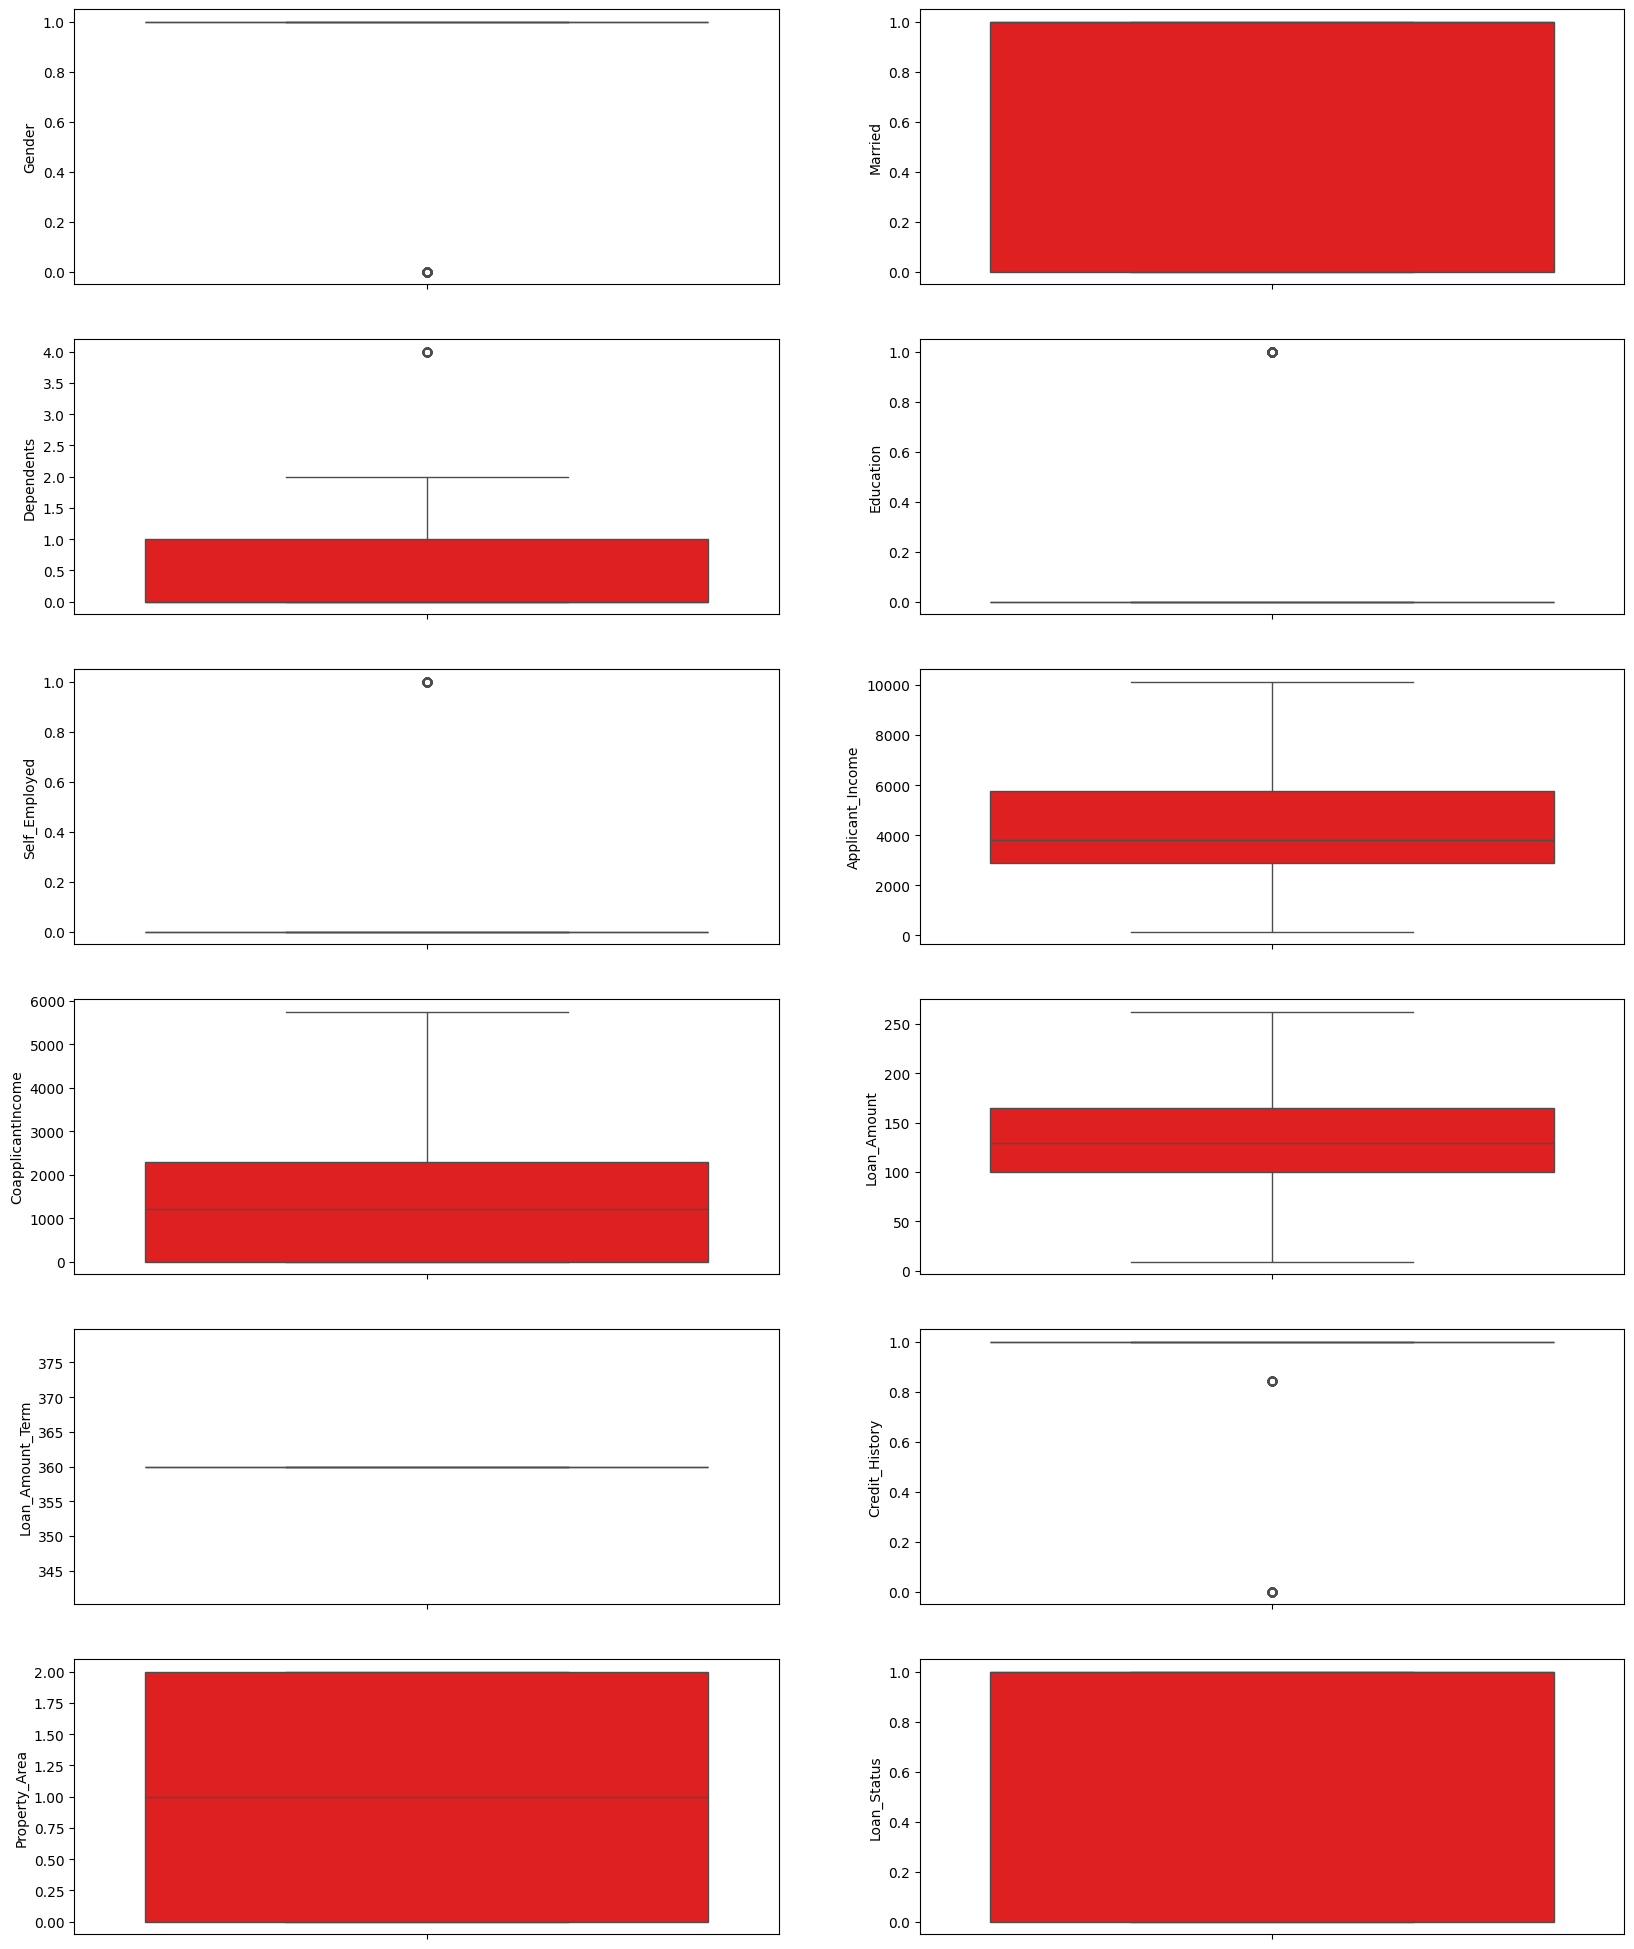

In [142]:
plt.figure(figsize=(20,25))
for i in enumerate(LSdf.columns):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(LSdf[i[1]],color='r')


In [143]:
LSdf.skew()

Gender              -1.646215
Married             -0.649810
Dependents           1.436670
Education            1.365098
Self_Employed        2.157034
Applicant_Income     1.035968
CoapplicantIncome    1.012844
Loan_Amount          0.657801
Loan_Amount_Term     0.000000
Credit_History      -1.960728
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [144]:
LSdf.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
Applicant_Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [145]:
from sklearn.preprocessing import power_transform


LSdf[['CoapplicantIncome']]=power_transform(LSdf[['CoapplicantIncome']],method='yeo-johnson')

In [146]:
LSdf[['Dependents']]=power_transform(LSdf[['Dependents']],method='yeo-johnson')

In [147]:
LSdf[['Applicant_Income']]=power_transform(LSdf[['Applicant_Income']],method='yeo-johnson')

In [148]:
LSdf[['Loan_Amount']]=power_transform(LSdf[['Loan_Amount']],method='yeo-johnson')

In [149]:
LSdf.skew()

Gender              -1.646215
Married             -0.649810
Dependents           0.396398
Education            1.365098
Self_Employed        2.157034
Applicant_Income     0.035628
CoapplicantIncome   -0.167999
Loan_Amount          0.023297
Loan_Amount_Term     0.000000
Credit_History      -1.960728
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [150]:
x=LSdf.drop(['Loan_Status'],axis=1)
y=LSdf['Loan_Status']

In [151]:
x


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.765196,0,0,0.194020,0.757032,-0.077428,360.0,1.0,0
1,1,1,-0.862075,0,1,-0.583461,-1.107517,-1.415112,360.0,1.0,2
2,1,1,-0.862075,1,0,-0.842019,0.903267,-0.227667,360.0,1.0,2
3,1,0,-0.862075,0,0,0.725333,-1.107517,0.156812,360.0,1.0,2
4,1,1,1.253496,0,1,0.520216,1.098428,1.956717,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,-0.862075,0,0,-0.642741,-1.107517,-1.288051,360.0,1.0,0
609,1,1,1.613460,0,0,-0.014289,-1.107517,-2.173255,360.0,1.0,0
610,1,1,0.765196,0,0,1.345998,0.200542,1.834087,360.0,1.0,2
611,1,1,1.253496,0,0,1.212030,-1.107517,0.907364,360.0,1.0,2


In [152]:
y

0      0
1      1
2      1
3      1
4      1
      ..
608    1
609    1
610    1
611    1
612    0
Name: Loan_Status, Length: 613, dtype: int32

In [153]:
x.shape

(613, 11)

In [92]:
y .shape

(613,)

In [ ]:
                SCALING INDEPENDENTS FEATURES 

In [154]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns =x.columns)

In [155]:
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472814,0.727103,0.765196,-0.528913,-0.392970,0.194020,0.757032,-0.077428,0.0,0.452149,-1.317053
1,0.472814,0.727103,-0.862075,-0.528913,2.544722,-0.583461,-1.107517,-1.415112,0.0,0.452149,1.225793
2,0.472814,0.727103,-0.862075,1.890668,-0.392970,-0.842019,0.903267,-0.227667,0.0,0.452149,1.225793
3,0.472814,-1.375322,-0.862075,-0.528913,-0.392970,0.725333,-1.107517,0.156812,0.0,0.452149,1.225793
4,0.472814,0.727103,1.253496,-0.528913,2.544722,0.520216,1.098428,1.956717,0.0,0.452149,1.225793
...,...,...,...,...,...,...,...,...,...,...,...
608,-2.114997,-1.375322,-0.862075,-0.528913,-0.392970,-0.642741,-1.107517,-1.288051,0.0,0.452149,-1.317053
609,0.472814,0.727103,1.613460,-0.528913,-0.392970,-0.014289,-1.107517,-2.173255,0.0,0.452149,-1.317053
610,0.472814,0.727103,0.765196,-0.528913,-0.392970,1.345998,0.200542,1.834087,0.0,0.452149,1.225793
611,0.472814,0.727103,1.253496,-0.528913,-0.392970,1.212030,-1.107517,0.907364,0.0,0.452149,1.225793


In [156]:
x.value_counts()

Gender     Married    Dependents  Education  Self_Employed  Applicant_Income  CoapplicantIncome  Loan_Amount  Loan_Amount_Term  Credit_History  Property_Area
 0.472814   0.727103   1.613460   -0.528913  -0.392970       1.849171         -1.107517           1.956717    0.0                0.452149       -1.317053        2
                       0.765196   -0.528913  -0.392970       1.849171         -1.107517           1.956717    0.0                0.452149        1.225793        2
-2.114997  -1.375322  -0.862075   -0.528913  -0.392970      -2.890126          1.053603          -0.363382    0.0                0.452149       -1.317053        1
 0.472814   0.727103   0.765196   -0.528913  -0.392970      -1.593240          0.814949          -0.712040    0.0                0.452149        1.225793        1
                       0.640952   -0.528913   2.544722       0.551539          1.121862          -1.313091    0.0                0.452149       -0.045630        1
                           

In [157]:
y.value_counts()

Loan_Status
1    421
0    192
Name: count, dtype: int64

In [158]:
from imblearn.over_sampling import SMOTE

In [163]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)


In [164]:
y1.value_counts()

Loan_Status
0    421
1    421
Name: count, dtype: int64

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.222831,Gender
1,1.502821,Married
2,1.227345,Dependents
3,1.096570,Education
4,1.065840,Self_Employed
5,1.920199,Applicant_Income
6,1.595523,CoapplicantIncome
7,1.630320,Loan_Amount
8,NaN,Loan_Amount_Term
9,1.009636,Credit_History


In [168]:
x1['Loan_Amount_Term'].var()

0.0

In [169]:
x1.drop('Loan_Amount_Term',axis=1,inplace=True)

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.222831,Gender
1,1.502821,Married
2,1.227345,Dependents
3,1.096570,Education
4,1.065840,Self_Employed
5,1.920199,Applicant_Income
6,1.595523,CoapplicantIncome
7,1.630320,Loan_Amount
8,1.009636,Credit_History
9,1.027019,Property_Area


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier



In [175]:
max_accuracy=0
max_randomState=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomState=i
print('best accuracy',max_accuracy,"at random state",max_randomState)


best accuracy 0.9011857707509882 at random state 128


In [176]:
 x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_randomState)

In [177]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.758893280632411
[[ 68  41]
 [ 20 124]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       109
           1       0.75      0.86      0.80       144

    accuracy                           0.76       253
   macro avg       0.76      0.74      0.75       253
weighted avg       0.76      0.76      0.75       253



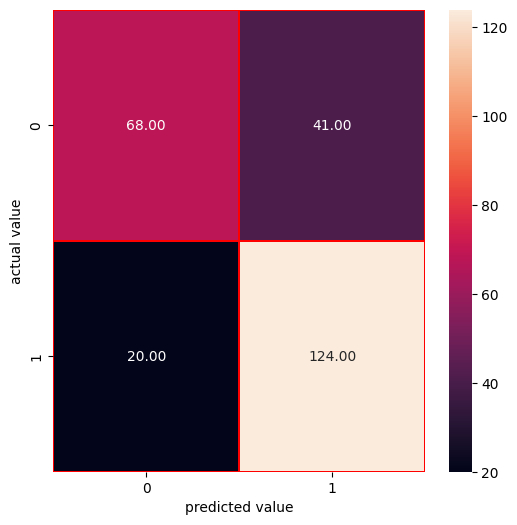

In [178]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.7707509881422925
[[ 71  38]
 [ 20 124]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       109
           1       0.77      0.86      0.81       144

    accuracy                           0.77       253
   macro avg       0.77      0.76      0.76       253
weighted avg       0.77      0.77      0.77       253



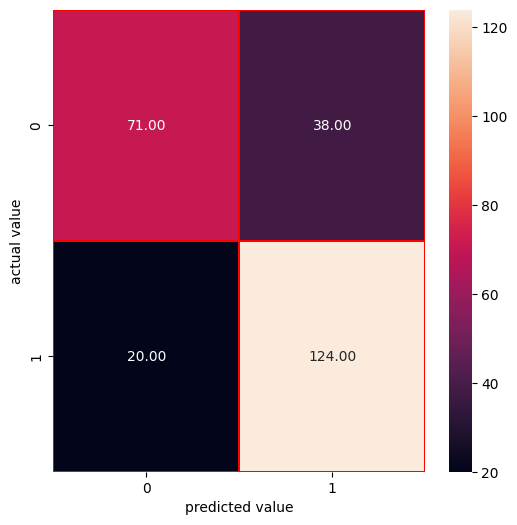

In [193]:
svc=SVC(kernel='rbf')
classification_models(svc,x_train,y_train,x_test ,y_test)

0.8893280632411067
[[ 96  13]
 [ 15 129]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       109
           1       0.91      0.90      0.90       144

    accuracy                           0.89       253
   macro avg       0.89      0.89      0.89       253
weighted avg       0.89      0.89      0.89       253



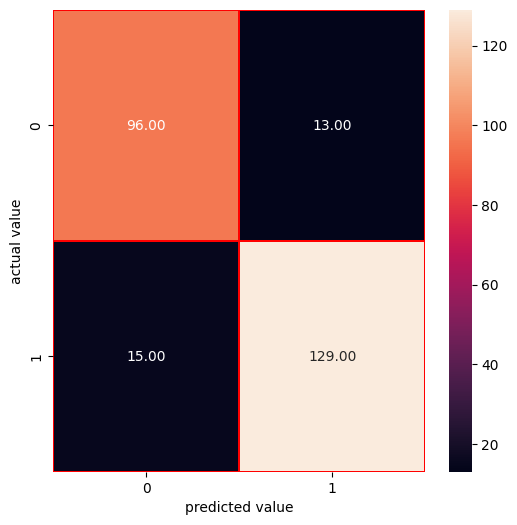

In [197]:
RFC=RandomForestClassifier()
classification_models(RFC,x_train,y_train,x_test,y_test)

0.849802371541502
[[ 93  16]
 [ 22 122]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       109
           1       0.88      0.85      0.87       144

    accuracy                           0.85       253
   macro avg       0.85      0.85      0.85       253
weighted avg       0.85      0.85      0.85       253



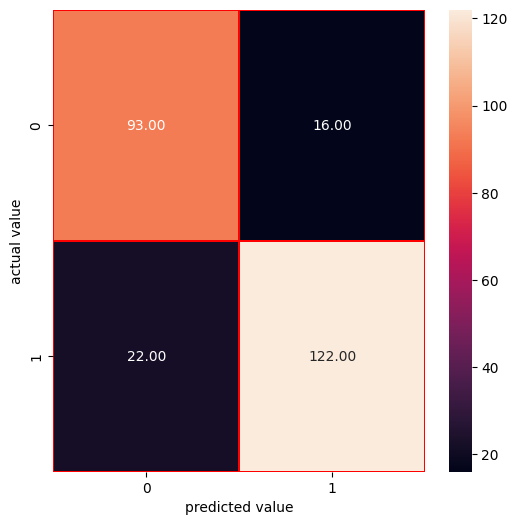

In [180]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.8616600790513834
[[ 90  19]
 [ 16 128]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.87      0.89      0.88       144

    accuracy                           0.86       253
   macro avg       0.86      0.86      0.86       253
weighted avg       0.86      0.86      0.86       253



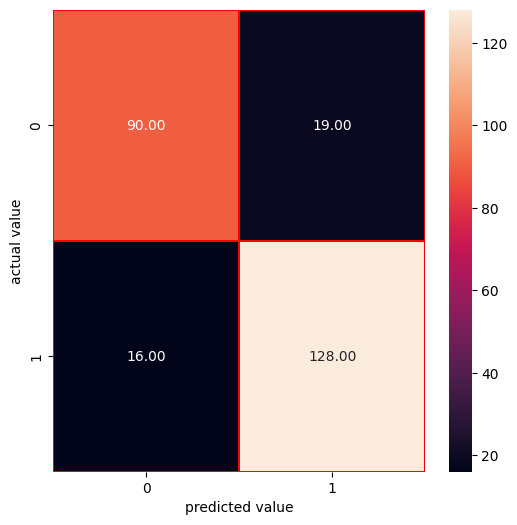

In [181]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.7707509881422925
[[ 94  15]
 [ 43 101]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       109
           1       0.87      0.70      0.78       144

    accuracy                           0.77       253
   macro avg       0.78      0.78      0.77       253
weighted avg       0.79      0.77      0.77       253



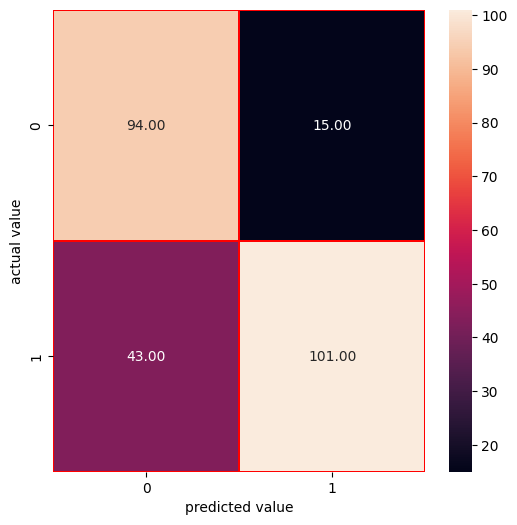

In [182]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.7905138339920948
[[ 91  18]
 [ 35 109]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       109
           1       0.86      0.76      0.80       144

    accuracy                           0.79       253
   macro avg       0.79      0.80      0.79       253
weighted avg       0.80      0.79      0.79       253



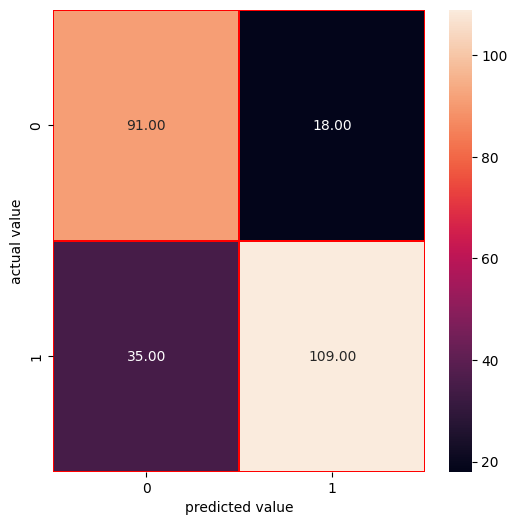

In [183]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [184]:
def cross_validation(model,X1_pca,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,X1_pca,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [185]:
cross_validation(LR,x1,y1,x_test)


[0.69230769 0.71005917 0.73214286 0.69642857 0.69047619]
0.7042828965905888
differnce between accuracy score and cross validation is 0.05461038404182217


In [199]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,x1,y1,x_test)


[0.76331361 0.78106509 0.88690476 0.86309524 0.89880952]
0.8386376444068752
differnce between accuracy score and cross validation is 0.05069041883423153


In [189]:
cross_validation(etc,x1,y1,x_test)

[0.78106509 0.79289941 0.88095238 0.88690476 0.89285714]
0.8469357565511413
differnce between accuracy score and cross validation is 0.002866614990360672


In [191]:
cross_validation(gbc,x1,y1,x_test)


[0.69230769 0.73372781 0.85119048 0.875      0.85119048]
0.8006832910679064
differnce between accuracy score and cross validation is 0.060976787983477054


In [192]:
cross_validation(dtc,x1,y1,x_test)

[0.66863905 0.69822485 0.73809524 0.79761905 0.80952381]
0.7424204001127078
differnce between accuracy score and cross validation is 0.048093433879387026


In [195]:
cross_validation(svc,x1,y1,x_test)

[0.72189349 0.75147929 0.75595238 0.70238095 0.75      ]
0.7363412228796845
differnce between accuracy score and cross validation is 0.03440976526260797


In [196]:
cross_validation(bgc,x1,y1,x_test)

[0.74556213 0.74556213 0.85119048 0.80952381 0.83928571]
0.798224852071006
differnce between accuracy score and cross validation is -0.027473863928713538


In [198]:
cross_validation(RFC,x1,y1,x_test)

[0.76331361 0.77514793 0.88095238 0.86904762 0.89285714]
0.8362637362637363
differnce between accuracy score and cross validation is 0.0530643269773704


                            KEY OBSERVATION

In [ ]:
            HYPERPARAMETER TUNNING OF THE SELECTED MODEL USING GRIDSEARCHCV

In [203]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [200]:
etc=ExtraTreesClassifier()

In [204]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5)


In [205]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [206]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [210]:
final_model=ExtraTreesClassifier(max_depth=8,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
score=cross_val_score(final_model,x1,y1,cv=5)
print(score)
print(score.mean()*100)
print('difference between accuracy score and cross validation score is ',(acc-score.mean())*100)


0.849802371541502
[0.73372781 0.74556213 0.82738095 0.80952381 0.82738095]
78.87151310228234
difference between accuracy score and cross validation score is  6.108724051867864


In [ ]:
                        PLOTING AUC_ROC CURVE 

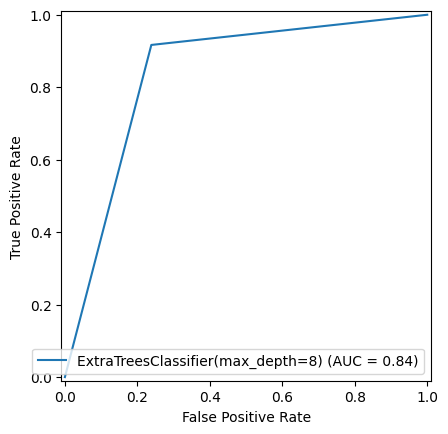

In [211]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [212]:
import joblib


In [213]:
joblib.dump(final_model,'Loan_Status.pkl')

['Loan_Status.pkl']

In [214]:
model=joblib.load('Loan_Status.pkl')

In [215]:
prd_test=np.array(y_test)

In [217]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [218]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=prd_test
df

,predicted,orignal
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
248,1,1
249,0,0
250,1,1
251,1,1
